# Comparando modelos de Forecasting (Time Series).

**Nesse projeto irei comparar os três métodos de Time Series Forecasting que temos, o clássico ARIMA(Autoregressive Integrated Moving Average), o Facebook Prophet e o LSTM (Long Short term Memory) já da parte de redes neurais (Deep Learning)**

### ARIMA (Autoregressive Integrated Moving Average)

Terminologias em ARIMA

O modelo ARIMA pode ser basicamente resumido por três fatores:

p = o número de termos autorregressivos
- p é o número de termos auto-regressivos (parte AR). Permite incorporar o efeito de valores
  passados em nosso modelo. Intuitivamente, isso seria semelhante ao afirmar que é
  provável que esteja quente amanhã se estiver quente nos últimos três dias.

d = o número é o fator que vamos aplicar para resolver a estacionaridade
- d é o número de diferenças não sazonais necessárias para a estacionariedade.
  Intuitivamente, isso seria semelhante ao afirmar que provavelmente haverá a mesma
  temperatura amanhã se a diferença de temperatura nos últimos três dias tiver sido muito
  pequena.

q = o número de termos da média móvel
- q é o número de erros de previsão atrasados na equação de previsão (parte MA). Isso nos
  permite definir o erro do nosso modelo como uma combinação linear dos valores de erro
  observados em momentos anteriores no passado.
  Estes são os três números inteiros (p, d, q) usados para parametrizar os modelos ARIMA.
  Portanto, isso é chamado de modelo “ARIMA (p, d, q)”.

### Facebook Prophet

O Prophet é um procedimento para prever dados de séries temporais com base em um modelo aditivo em que tendências não lineares são ajustadas com sazonalidade anual, semanal e diária, além dos efeitos de feriados. Funciona melhor com séries temporais que têm fortes efeitos sazonais e várias temporadas de dados históricos. O Prophet é robusto para dados ausentes e mudanças na tendência, e normalmente lida bem com outliers.

### LSTM (Long Short term Memory)

A LSTM é uma arquitetura de rede neural recorrente (RNN) que “lembra” valores em intervalos arbitrários. A LSTM é bem adequada para classificar, processar e prever séries temporais com intervalos de tempo de duração desconhecida. A insensibilidade relativa ao comprimento do gap dá uma vantagem à LSTM em relação a RNNs tradicionais (também chamadas “vanilla”), Modelos Ocultos de Markov (MOM) e outros métodos de aprendizado de sequências.

A estrutura de uma RNN é muito semelhante ao Modelo Oculto de Markov. No entanto, a principal diferença é como os parâmetros são calculados e construídos. Uma das vantagens da LSTM é a insensibilidade ao comprimento do gap. RNN e MOM dependem do estado oculto antes da emissão / sequência. Se quisermos prever a sequência após 1.000 intervalos em vez de 10, o modelo esqueceu o ponto de partida até então. Mas um modelo LSTM é capaz de “lembrar” por conta de sua estrutura de células, o diferencial da arquitetura LSTM.

A LSTM possui uma estrutura em cadeia que contém quatro redes neurais e diferentes blocos de memória chamados células.

<img src="https://i.imgur.com/Ooq3hRT.png" />

A informação é retida pelas células e as manipulações de memória são feitas pelos portões (gates). Existem três portões:

Forget Gate: As informações que não são mais úteis no estado da célula são removidas com o forget gate. Duas entradas: x_t (entrada no momento específico) e h_t-1 (saída de célula anterior) são alimentadas ao gate e multiplicadas por matrizes de peso, seguidas pela adição do bias. O resultante é passado por uma função de ativação que fornece uma saída binária. Se para um determinado estado de célula a saída for 0, a informação é esquecida e para a saída 1, a informação é retida para uso futuro.

Input Gate: A adição de informações úteis ao estado da célula é feita pelo input gate. Primeiro, a informação é regulada usando a função sigmoide que filtra os valores a serem lembrados de forma similar ao forget gate usando as entradas h_t-1 e x_t. Então, um vetor é criado usando a função tanh que dá saída de -1 a +1, que contém todos os valores possíveis de h_t-1 e x_t. Os valores do vetor e os valores regulados são multiplicados para obter as informações úteis

Output Gate: A tarefa de extrair informações úteis do estado da célula atual para ser apresentadas como uma saída é feita pelo output gate. Primeiro, um vetor é gerado aplicando a função tanh na célula. Então, a informação é regulada usando a função sigmóide que filtra os valores a serem lembrados usando as entradas h_t-1 e x_t. Os valores do vetor e os valores regulados são multiplicados para serem enviados como uma saída e entrada para a próxima célula.

A célula RNN recebe duas entradas, a saída do último estado oculto e a observação no tempo = t. Além do estado oculto, não há informações sobre o passado para se lembrar. A memória de longo prazo é geralmente chamada de estado da célula. As setas em loop indicam a natureza recursiva da célula. Isso permite que as informações dos intervalos anteriores sejam armazenadas na célula LSTM. O estado da célula é modificado pelo forget gate colocado abaixo do estado da célula e também ajustado pela porta de modulação de entrada. Da equação, o estado da célula anterior esquece, multiplica-se com a porta do esquecimento e adiciona novas informações através da saída das portas de entrada.

Algumas das famosas aplicações das LSTMs incluem:

- Modelagem de Linguagem
- Tradução de Idiomas
- Legendas em Imagens
- Geração de Texto
- Chatbots

# Dados:

## Vendas de autoveículos no Brasil.

<img src="https://i.imgur.com/isgusta.jpg" />

Valor da produção de veículos automotores no País. Refletem o desempenho das vendas das empresas associadas a(o): estoque e venda de veículos pelas concessionárias produção e vendas de veículos e congêneres produção e vendas de motociclos.

Fonte: https://www3.bcb.gov.br/sgspub/consultarvalores/consultarValoresSeries.do?method=consultarGraficoPorId&hdOidSeriesSelecionadas=1378

## Vamos lá !

In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")

In [2]:
%time data = pd.read_csv('C:/Users/skite/OneDrive/Documentos/GitHub/Projeto_comparacao_entre_modelos_TimeSeries/bcdata.sgs.1378.csv', sep = ';', encoding  = 'UTF-8')

Wall time: 6.98 ms


In [3]:
data.head()

,data,valor
0,01/01/1981,87939
1,01/02/1981,65251
2,01/03/1981,64065
3,01/04/1981,69042
4,01/05/1981,62966


In [4]:
data.tail()

,data,valor
472,01/05/2020,56266
473,01/06/2020,135140
474,01/07/2020,184818
475,01/08/2020,193650
476,01/09/2020,219033


**Temos dados de 01/01/1981 até 01/09/2020, ou seja, 39 anos de registro de venda de Autoveículos.**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    477 non-null    object
 1   valor   477 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.6+ KB


**Ajuste da variável data**

In [6]:
data['data'] = data['data'].str[3:]

In [7]:
data['ano'] = data['data'].str[3:]

In [8]:
data['valor'] = data.valor.astype('float')
data['ano'] = data.ano.astype('int')

In [9]:
data

,data,valor,ano
0,01/1981,87939.0,1981
1,02/1981,65251.0,1981
2,03/1981,64065.0,1981
3,04/1981,69042.0,1981
4,05/1981,62966.0,1981
...,...,...,...
472,05/2020,56266.0,2020
473,06/2020,135140.0,2020
474,07/2020,184818.0,2020
475,08/2020,193650.0,2020


**Filtro**

In [10]:
data = data.loc[(data['ano'] >= 1981) & (data['ano'] <= 2019)]

In [11]:
data

,data,valor,ano
0,01/1981,87939.0,1981
1,02/1981,65251.0,1981
2,03/1981,64065.0,1981
3,04/1981,69042.0,1981
4,05/1981,62966.0,1981
...,...,...,...
463,08/2019,253575.0,2019
464,09/2019,246657.0,2019
465,10/2019,258149.0,2019
466,11/2019,250468.0,2019


In [12]:
data = data.drop(['ano'], axis='columns')

**Vamos determinar a data como índice e aplicar o Datetime para transformar a variável.**

In [13]:
data.data = pd.to_datetime(data.data)

In [14]:
data = data.set_index("data")
data.head()

,valor
data,
1981-01-01,87939.0
1981-02-01,65251.0
1981-03-01,64065.0
1981-04-01,69042.0
1981-05-01,62966.0


**Vamos definir a frequência do dados para mensal**

In [15]:
data.index.freq = 'MS'

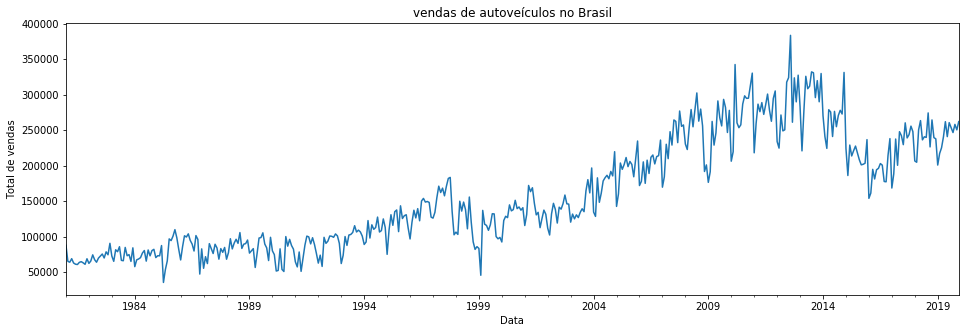

In [16]:
ax = data['valor'].plot(figsize = (16,5), title = "vendas de autoveículos no Brasil")
ax.set(xlabel='Data', ylabel='Total de vendas');

**Analisando as vendas ao longo dos anos, mostra que as vendas de autoveículos não é nada sazonal onde temos grande quedas próximos dos anos de 1985, 1999, e 2020**

**Vamos utilizar o "seasonal_decompose" para verificar o comportamento da série**

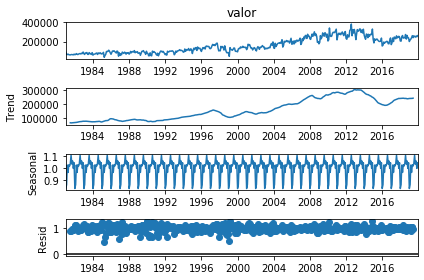

In [17]:
a = seasonal_decompose(data["valor"], model = "multiplicative")
a.plot();

**Seasonal**

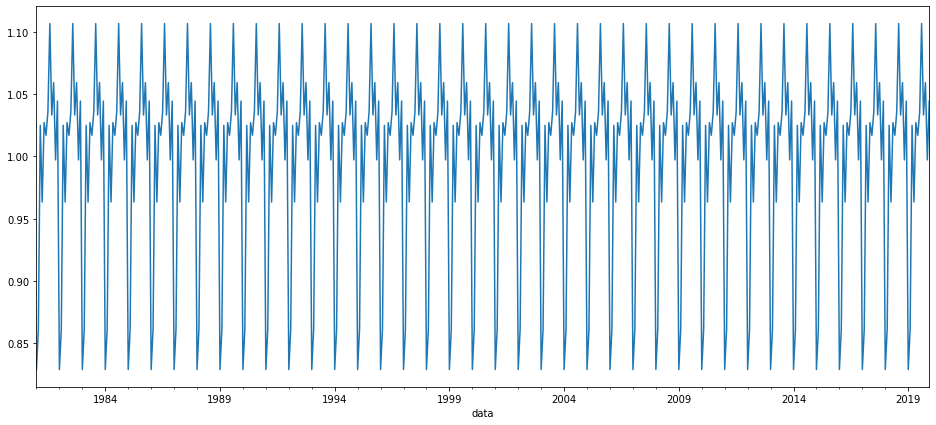

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
a.seasonal.plot();

# Previsão com o ARIMA

**Vamos executar a função auto_arima () para obter os melhores valores p, d, q**

In [19]:
# auto_arima(data['valor'], seasonal=True, m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4).summary()

**Como podemos ver os melhores parametros que o  auto_arima() nos retornou foi SARIMAX(5, 1, 4)x(2, 0, 2, 12)**

**Ok, agora vamos separar os dados de treino e teste**

In [20]:
train_data = data[:len(data)-12]
test_data = data[len(data)-12:]

In [21]:
train_data

,valor
data,
1981-01-01,87939.0
1981-02-01,65251.0
1981-03-01,64065.0
1981-04-01,69042.0
1981-05-01,62966.0
...,...
2018-08-01,274312.0
2018-09-01,226447.0
2018-10-01,264434.0


In [22]:
test_data

,valor
data,
2019-01-01,200890.0
2019-02-01,217205.0
2019-03-01,225222.0
2019-04-01,240679.0
2019-05-01,261975.0
2019-06-01,240913.0
2019-07-01,260607.0
2019-08-01,253575.0
2019-09-01,246657.0


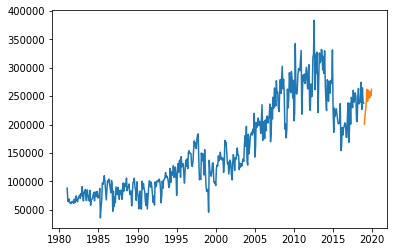

In [23]:
plt.plot(train_data)
plt.plot(test_data)

## Vamos aplicar os parâmetros obtidos pelo o auto_arima() no SARIMAX e compará-lo com os dados reais.

In [24]:
arima_model = SARIMAX(train_data['valor'], order = (5,1,4), seasonal_order = (2,0,2,12))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                   valor   No. Observations:                  456
Model:             SARIMAX(5, 1, 4)x(2, 0, [1, 2], 12)   Log Likelihood               -5128.935
Date:                                 Wed, 04 Nov 2020   AIC                          10285.871
Time:                                         19:11:22   BIC                          10343.555
Sample:                                     01-01-1981   HQIC                         10308.596
                                          - 12-01-2018                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0286      0.148     -0.192      0.847      -0.320       0.262
ar.L2          0.1792      0.125      1.431      0.152      -0.066       0.425
ar.L3          0.9459      0.038     24.676      0.000       0.871       1.021
ar.L4         -0.1583      0.132     -1.199      0.231      -0.417       0.101
ar.L5         -0.0164      0.083     -0.197      0.844      -0.180       0.147
ma.L1         -0.4873      0.136     -3.571      0.000      -0.755      -0.220
ma.L2         -0.2858      0.071     -4.032      0.000      -0.425      -0.147
ma.L3         -0.8532      0.062    -13.859      0.000      -0.974      -0.733
ma.L4          0.6368      0.126      5.038      0.000       0.389       0.885
ar.S.L12       1.2057      0.623      1.937      0.053      -0.014       2.426
ar.S.L24      -0.2295      0.584     -0.393      0.694      -1.374       0.915
ma.S.L12      -0.9243      0.636     -1.453      0.146      -2.171       0.322
ma.S.L24       0.0585      0.472      0.124      0.901      -0.867       0.984
sigma2      4.897e+08    2.8e-09   1.75e+17      0.000     4.9e+08     4.9e+08
===================================================================================
Ljung-Box (Q):                       61.54   Jarque-Bera (JB):                76.59
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               2.95   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.59e+33. Standard errors may be unstable.
"""

**Vamos comparar o modelo.**

In [25]:
arima_pred = arima_result.predict(start = len(train_data), end = len(data)-1, typ="levels").rename("Previsão ARIMA")
arima_pred

2019-01-01    213092.628987
2019-02-01    201942.226409
2019-03-01    236590.014980
2019-04-01    246594.876472
2019-05-01    233138.930980
2019-06-01    239204.577545
2019-07-01    251209.000615
2019-08-01    251425.698814
2019-09-01    235719.804753
2019-10-01    255536.327789
2019-11-01    235735.004486
2019-12-01    256292.960481
Freq: MS, Name: Previsão ARIMA, dtype: float64

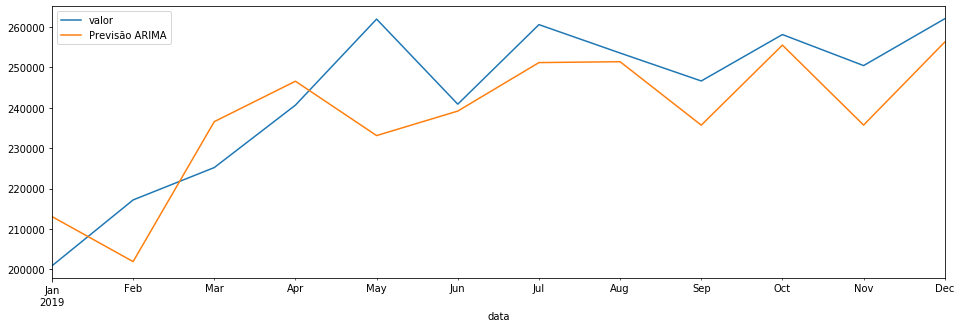

In [26]:
test_data['valor'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

**Note como a previsão do modelo ARIMA se comporta, observe também que ele não consegue acompanhar a queda brusca que tivemos nas vendas de Autoveículos no mes de abril até maio, isso se dá ao fato que nesses dois mês tivemos o pico do  da COVID-19 no Brasil onde a população teve que ficar confinada em seus lares e fabricas e lojas tiveram que ser fechadas para conter o  avanço dos casos da COVID no país.**

**Por esse motivo essa queda brusta será muito dificil de ser acompanlhada, poís uma queda desse tipo não ocorreu nos 39 anos anteriores.**

In [27]:
arima_rmse_error = rmse(test_data['valor'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = data['valor'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 154186120.02530438
RMSE Error: 12417.170371115328
Mean: 158793.8311965812


In [28]:
test_data['ARIMA_Predictions'] = arima_pred

# Previsão com o LSTM

**Primeiro passo vamos fazer a normalização dos dados com o MinMaxScaler**

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [30]:
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

**Para utilizar o LSTM vamos usar o Time Series Generator object.**

In [31]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

Using TensorFlow backend.


In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

**Criação da Rede com o Keras**

In [33]:
lstm_model = Sequential()

**Camadas da LSTM**

In [34]:
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))

**Compilação do Modelo**

In [35]:
lstm_model.compile(optimizer='adam', loss='mse')

**Sumário do Modelo**

In [36]:
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


**Ajuste do Modelo**

In [37]:
lstm_model.fit_generator(generator, epochs=80)

Epoch 1/80
444/444 [==============================] - 5s 12ms/step - loss: 0.0111
Epoch 2/80
444/444 [==============================] - 5s 11ms/step - loss: 0.0060
Epoch 3/80
444/444 [==============================] - 5s 10ms/step - loss: 0.0066
Epoch 4/80
444/444 [==============================] - 5s 11ms/step - loss: 0.0062
Epoch 5/80
444/444 [==============================] - 6s 13ms/step - loss: 0.0058
Epoch 6/80
444/444 [==============================] - 5s 12ms/step - loss: 0.0049
Epoch 7/80
444/444 [==============================] - 5s 12ms/step - loss: 0.0051
Epoch 8/80
444/444 [==============================] - 5s 12ms/step - loss: 0.0049
Epoch 9/80
444/444 [==============================] - 5s 11ms/step - loss: 0.0049
Epoch 10/80
444/444 [==============================] - 5s 11ms/step - loss: 0.0047
Epoch 11/80
444/444 [==============================] - 6s 13ms/step - loss: 0.0049
Epoch 12/80
444/444 [==============================] - 5s 11ms/step - loss: 0.0046
Epoch 13/80
4

In [38]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

**Como os dados foram normalizados precisamos retorná-los à forma original.**

**Esses são os valores normalizados**

In [39]:
lstm_predictions_scaled

[array([0.56814206], dtype=float32),
 array([0.5457536], dtype=float32),
 array([0.6076209], dtype=float32),
 array([0.6316001], dtype=float32),
 array([0.6148877], dtype=float32),
 array([0.62892246], dtype=float32),
 array([0.6305611], dtype=float32),
 array([0.6577841], dtype=float32),
 array([0.6219485], dtype=float32),
 array([0.6463009], dtype=float32),
 array([0.6354626], dtype=float32),
 array([0.6225729], dtype=float32)]

**Vamos reverter os valores o inverse_transform**

In [40]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
lstm_predictions

array([[233270.02854705],
       [225479.96449828],
       [247006.69038355],
       [255350.24850428],
       [249535.1802206 ],
       [254418.57081413],
       [254988.73939276],
       [264460.97910762],
       [251991.97382689],
       [260465.40229678],
       [256694.20544565],
       [252209.24015999]])

### Vamos comparar o modelo.

In [41]:
test_data['LSTM_Predictions'] = lstm_predictions

In [42]:
test_data

,valor,ARIMA_Predictions,LSTM_Predictions
data,,,
2019-01-01,200890.0,213092.628987,233270.028547
2019-02-01,217205.0,201942.226409,225479.964498
2019-03-01,225222.0,236590.014980,247006.690384
2019-04-01,240679.0,246594.876472,255350.248504
2019-05-01,261975.0,233138.930980,249535.180221
2019-06-01,240913.0,239204.577545,254418.570814
2019-07-01,260607.0,251209.000615,254988.739393
2019-08-01,253575.0,251425.698814,264460.979108
2019-09-01,246657.0,235719.804753,251991.973827


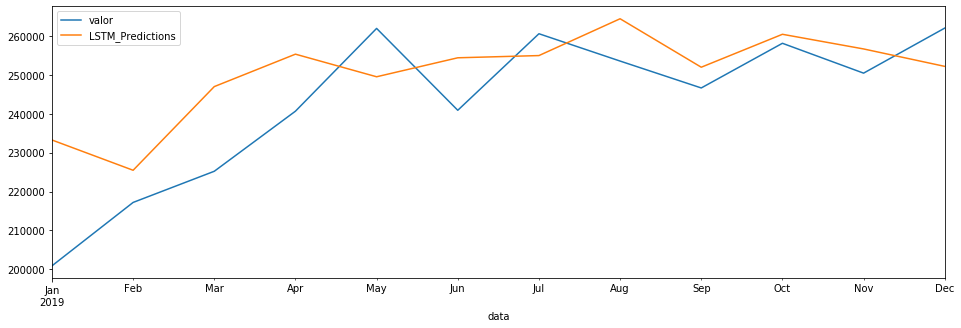

In [43]:
test_data['valor'].plot(figsize = (16,5), legend=True)
test_data['LSTM_Predictions'].plot(legend = True);

**Cálculo do Erro**

In [44]:
lstm_rmse_error = rmse(test_data['valor'], test_data["LSTM_Predictions"])
lstm_mse_error = lstm_rmse_error**2
mean_value = data['valor'].mean()

print(f'MSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}\nMean: {mean_value}')

MSE Error: 205300772.9575031
RMSE Error: 14328.320660757949
Mean: 158793.8311965812


# Previsão com o Prophet

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 468 entries, 1981-01-01 to 2019-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   valor   468 non-null    float64
dtypes: float64(1)
memory usage: 7.3 KB


**Vamos fazer uma copia do DataSet original**

In [59]:
data_pr = data.copy()
data_pr = data.reset_index()

**Formatação das colunas para o padrão do Prophet**

In [60]:
data_pr.columns = ['ds','y'] 

In [61]:
train_data_pr = data_pr.iloc[:len(data)-12]
test_data_pr = data_pr.iloc[len(data)-12:]

In [62]:
from fbprophet import Prophet

In [63]:
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=12,freq='MS')
prophet_pred = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [64]:
prophet_pred.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
463,2019-08-01,215293.850855,202088.151433,258577.195311,215034.060865,215547.691172,15066.502903,15066.502903,15066.502903,15066.502903,15066.502903,15066.502903,0.0,0.0,0.0,230360.353758
464,2019-09-01,214688.235829,192308.525698,251433.795062,214341.337062,215016.889673,7665.828970,7665.828970,7665.828970,7665.828970,7665.828970,7665.828970,0.0,0.0,0.0,222354.064799
465,2019-10-01,214102.156772,193443.421214,255928.493193,213638.835481,214579.983666,10533.167062,10533.167062,10533.167062,10533.167062,10533.167062,10533.167062,0.0,0.0,0.0,224635.323834
466,2019-11-01,213496.541746,185434.404154,246012.273918,212923.382671,214086.639450,3679.146381,3679.146381,3679.146381,3679.146381,3679.146381,3679.146381,0.0,0.0,0.0,217175.688127
467,2019-12-01,212910.462689,196196.781534,256113.687530,212216.719978,213632.238193,12706.301012,12706.301012,12706.301012,12706.301012,12706.301012,12706.301012,0.0,0.0,0.0,225616.763701


In [65]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-12:]['ds'], "Pred" : prophet_pred[-12:]["yhat"]})

In [66]:
prophet_pred = prophet_pred.set_index("Date")

In [67]:
prophet_pred.index.freq = "MS"

In [68]:
prophet_pred

,Pred
Date,
2019-01-01,193169.807875
2019-02-01,196045.687059
2019-03-01,225799.005481
2019-04-01,216160.929288
2019-05-01,225425.474979
2019-06-01,216759.589474
2019-07-01,222100.195173
2019-08-01,230360.353758
2019-09-01,222354.064799


In [69]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values

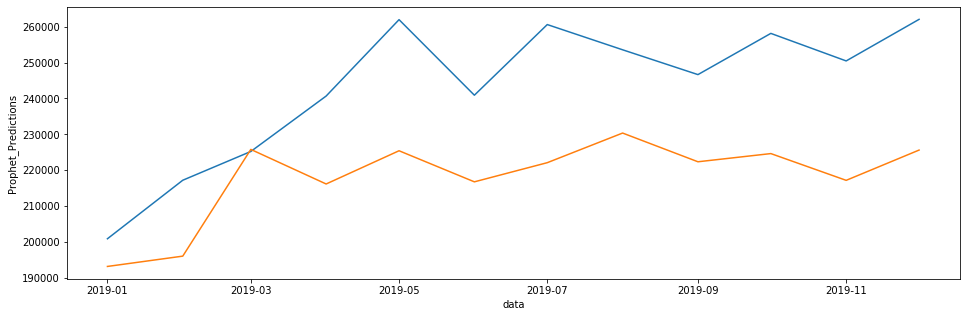

In [70]:
import seaborn as sns
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["valor"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [71]:
prophet_rmse_error = rmse(test_data['valor'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = data['valor'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 766668508.8454291
RMSE Error: 27688.77947554621
Mean: 158793.8311965812


## Comparativo entre os modelos

In [72]:
rmse_errors = [arima_rmse_error, lstm_rmse_error, prophet_rmse_error]
mse_errors = [arima_mse_error, lstm_mse_error, prophet_mse_error]
errors = pd.DataFrame({"Models" : ["ARIMA", "LSTM", "Prophet"],"RMSE Errors" : rmse_errors, "MSE Errors" : mse_errors})

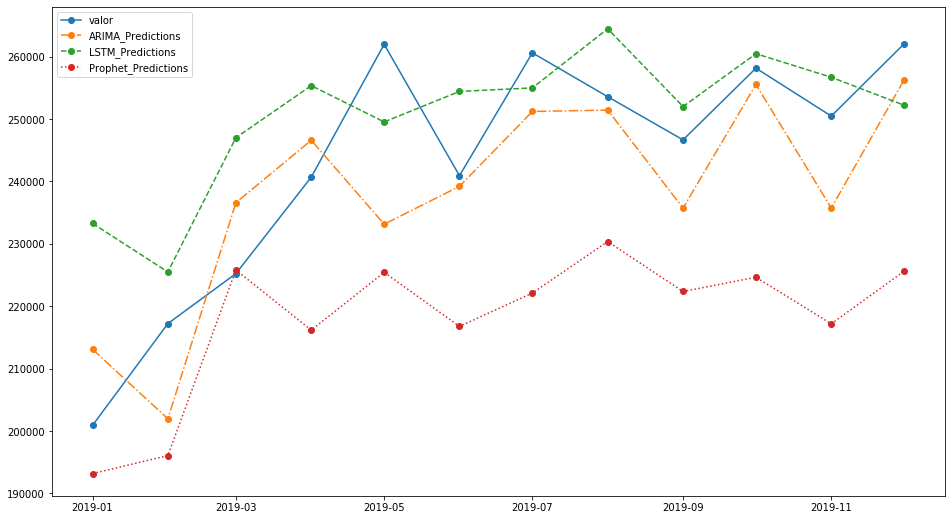

In [79]:
plt.figure(figsize=(16,9))
plt.plot_date(test_data.index, test_data["valor"], linestyle="-", label='valor')
plt.plot_date(test_data.index, test_data["ARIMA_Predictions"], linestyle="-.", label='ARIMA_Predictions')
plt.plot_date(test_data.index, test_data["LSTM_Predictions"], linestyle="--", label='LSTM_Predictions')
plt.plot_date(test_data.index, test_data["Prophet_Predictions"], linestyle=":", label='Prophet_Predictions')
plt.legend()
plt.show()

In [81]:
print(f"Mean: {test_data['valor'].mean()}")
errors

Mean: 243200.0


,Models,RMSE Errors,MSE Errors
0,ARIMA,12417.170371,1.541861e+08
1,LSTM,14328.320661,2.053008e+08
2,Prophet,27688.779476,7.666685e+08


In [82]:
test_data

,valor,ARIMA_Predictions,LSTM_Predictions,Prophet_Predictions
data,,,,
2019-01-01,200890.0,213092.628987,233270.028547,193169.807875
2019-02-01,217205.0,201942.226409,225479.964498,196045.687059
2019-03-01,225222.0,236590.014980,247006.690384,225799.005481
2019-04-01,240679.0,246594.876472,255350.248504,216160.929288
2019-05-01,261975.0,233138.930980,249535.180221,225425.474979
2019-06-01,240913.0,239204.577545,254418.570814,216759.589474
2019-07-01,260607.0,251209.000615,254988.739393,222100.195173
2019-08-01,253575.0,251425.698814,264460.979108,230360.353758
2019-09-01,246657.0,235719.804753,251991.973827,222354.064799
